# Team Silkroad

---

The time has come to take our game underground.  Our company is being hired to provide insights and metrics for a government contract entity that can potentially evaluate emerging crypto-currencies.  Understanding these markets will help ongoing and future investigations of illegal underground marketplaces operating from [darknets](https://en.wikipedia.org/wiki/Darknet_market).

The general goals are:

- Invent some quality metric(s) to help us measure these currencies
- Project any kind of lifetime of given market
- Volatility
- Impact of "mine-ability" on any of the above

### End with addressing this one question:  If one were to open or operate an illegal marketplace, which currency choice is best?

The point of this exercise is to assess the viability of this dataset to answer our questions of interest.  If the dataset cannot address these questions effectively:

 - Why not? What are the limitations?
 - What other data would we need?
 - What questions could this dataset address, if not the original intended asks for this project?
 
Please address the above in your presentation.  Framing is key!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

currencies = pd.read_csv("./datasets/currencies_and_assets.csv")
exchanges = pd.read_csv("./datasets/exchanges_and_markets.csv")

In [2]:
# clean currencies 
def clean_numeric_cell(value):
    if type(value) == str:
        value = value.replace('$','').replace(',','').replace('%','') # remove $ from prices to facilitate sorting
    try:
        value = float(value)
    except:
        value = np.NaN # convert invalid values to NaN
    return value

numeric_columns_currencies = ['Price', 'Market Capitalization', "Volume (17 Oct. '14)", "Available suppy"]
for column_name in numeric_columns_currencies:
    currencies[column_name] = currencies[column_name].apply(clean_numeric_cell)

currencies.info() # ensure numeric_columns are in float type 
currencies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 12 columns):
Name                     533 non-null object
Image                    533 non-null object
Type                     533 non-null object
Status                   380 non-null object
Symbol                   505 non-null object
Platform                 28 non-null object
Market Capitalization    485 non-null float64
Price                    533 non-null float64
Available suppy          485 non-null float64
Volume (17 Oct. '14)     373 non-null float64
More Information         519 non-null object
Profile                  533 non-null object
dtypes: float64(4), object(8)
memory usage: 50.0+ KB


,Name,Image,Type,Status,Symbol,Platform,Market Capitalization,Price,Available suppy,Volume (17 Oct. '14),More Information,Profile
0,RosCoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,NaN,ROS,NaN,39669.0,0.00,75737672.0,14995.0,http://216.231.132.86:2000/chain/Roscoin,https://coinmarketcap.com/currencies/roscoin/
1,365Coin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,365,NaN,2714.0,19.42,140.0,NaN,http://365coin.net/,https://coinmarketcap.com/currencies/365coin/
2,DarkFox,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,NaN,DRX,NaN,304.0,0.00,576390.0,NaN,http://62.113.238.105/chain/darkfox,https://coinmarketcap.com/currencies/darkfox/
3,66 Coin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,66,NaN,NaN,30.59,NaN,NaN,http://66coin.org/,https://coinmarketcap.com/currencies/66-coin/
4,Acoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,ACOIN,NaN,3168.0,0.02,150530.0,71.0,http://a-coin.info,https://coinmarketcap.com/currencies/acoin/


In [3]:
# clean exchanges 
numeric_columns_exchanges = ['Price',"Volume (17 Oct. '14)",'Volume (%)','Percentage of Market']
for column_name in numeric_columns_exchanges:
    exchanges[column_name] = exchanges[column_name].apply(clean_numeric_cell)

exchanges.info()
exchanges.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 7 columns):
ID                      1330 non-null object
Traded Currencies       1330 non-null object
Percentage of Market    1320 non-null float64
Source                  1330 non-null object
Volume (17 Oct. '14)    1330 non-null float64
Price                   1330 non-null float64
Volume (%)              1330 non-null float64
dtypes: float64(4), object(3)
memory usage: 72.8+ KB


,ID,Traded Currencies,Percentage of Market,Source,Volume (17 Oct. '14),Price,Volume (%)
0,Cryptsy - 42 Coin / Bitcoin,"42 Coin, Bitcoin",0.0,Cryptsy,673.0,2330.00,96.47
1,SwissCEX - 42 Coin / Bitcoin,"42 Coin, Bitcoin",0.0,SwissCEX,0.0,2016.00,0.00
2,Cryptsy - 42 Coin / Ripple,"42 Coin, Ripple",0.0,Cryptsy,25.0,2151.00,3.53
3,Coin-Swap - 66 Coin / Bitcoin,"66 Coin, Bitcoin",0.0,Coin-Swap,0.0,30.55,100.00
4,C-CEX - Abundance2 / Bitcoin,"Abundance2, Bitcoin",0.0,C-CEX,36.0,0.02,100.00


In [4]:
# split exchanges' traded currencies to 2 columns
exchanges['Traded Currency 1'] = exchanges['Traded Currencies'].apply(lambda x: x.split(',')[0])
exchanges['Traded Currency 2'] = exchanges['Traded Currencies'].apply(lambda x: x.split(',')[1])
exchanges.head()

,ID,Traded Currencies,Percentage of Market,Source,Volume (17 Oct. '14),Price,Volume (%),Traded Currency 1,Traded Currency 2
0,Cryptsy - 42 Coin / Bitcoin,"42 Coin, Bitcoin",0.0,Cryptsy,673.0,2330.00,96.47,42 Coin,Bitcoin
1,SwissCEX - 42 Coin / Bitcoin,"42 Coin, Bitcoin",0.0,SwissCEX,0.0,2016.00,0.00,42 Coin,Bitcoin
2,Cryptsy - 42 Coin / Ripple,"42 Coin, Ripple",0.0,Cryptsy,25.0,2151.00,3.53,42 Coin,Ripple
3,Coin-Swap - 66 Coin / Bitcoin,"66 Coin, Bitcoin",0.0,Coin-Swap,0.0,30.55,100.00,66 Coin,Bitcoin
4,C-CEX - Abundance2 / Bitcoin,"Abundance2, Bitcoin",0.0,C-CEX,36.0,0.02,100.00,Abundance2,Bitcoin


In [5]:
currencies.head()

,Name,Image,Type,Status,Symbol,Platform,Market Capitalization,Price,Available suppy,Volume (17 Oct. '14),More Information,Profile
0,RosCoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,NaN,ROS,NaN,39669.0,0.00,75737672.0,14995.0,http://216.231.132.86:2000/chain/Roscoin,https://coinmarketcap.com/currencies/roscoin/
1,365Coin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,365,NaN,2714.0,19.42,140.0,NaN,http://365coin.net/,https://coinmarketcap.com/currencies/365coin/
2,DarkFox,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,NaN,DRX,NaN,304.0,0.00,576390.0,NaN,http://62.113.238.105/chain/darkfox,https://coinmarketcap.com/currencies/darkfox/
3,66 Coin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,66,NaN,NaN,30.59,NaN,NaN,http://66coin.org/,https://coinmarketcap.com/currencies/66-coin/
4,Acoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,ACOIN,NaN,3168.0,0.02,150530.0,71.0,http://a-coin.info,https://coinmarketcap.com/currencies/acoin/


In [26]:
currencies.sort_values('Market Capitalization',ascending=False).head()

,Name,Image,Type,Status,Symbol,Platform,Market Capitalization,Price,Available suppy,Volume (17 Oct. '14),More Information,Profile,check
431,Bitcoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,BTC,NaN,5.120094e+09,382.31,1.339245e+07,27154900.0,https://bitcoin.org/,https://coinmarketcap.com/currencies/bitcoin/,1.339252e+07
508,Ripple,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,NaN,XRP,NaN,1.417435e+08,0.00,2.898925e+10,256918.0,https://ripple.com/currency/,https://coinmarketcap.com/currencies/ripple/,inf
504,Litecoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,LTC,NaN,1.315278e+08,3.99,3.297610e+07,4409110.0,https://litecoin.org,https://coinmarketcap.com/currencies/litecoin/,3.296437e+07
24,BitSharesX,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,NaN,BTSX,NaN,5.267633e+07,0.03,1.999884e+09,286116.0,http://bitshares-x.info,https://coinmarketcap.com/currencies/bitshares-x/,1.755878e+09
92,Dogecoin,https://coinmarketcap.com/static/img/coins/16x...,Cryptocurrency,Minable,DOGE,NaN,2.451555e+07,0.00,9.430616e+10,275071.0,http://dogecoin.com/,https://coinmarketcap.com/currencies/dogecoin/,inf


In [25]:
currencies['check']=currencies["Market Capitalization"]/currencies['Price']

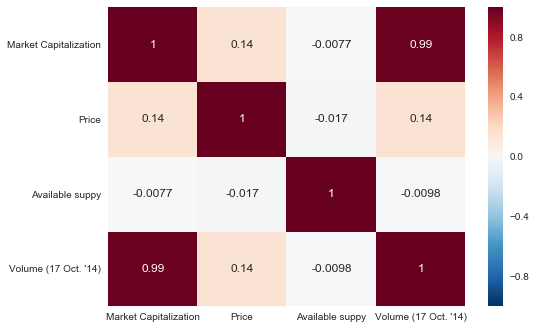

In [23]:
sns.heatmap(currencies.corr(),annot=True)
plt.show()